**End-to-End Machine Learning Project:** Customer Churn Prediction Machine Learning Model

**Author** - Manickashree "Madhu" Thayumana Sundaram

In [1]:
## Importing the required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score,confusion_matrix,classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve, auc
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
import numpy as np


In [4]:
# Loading the dataset
churn = pd.read_csv('/content/Churn_Modelling.csv')

## Viewing the top 5 records
churn.head(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
# Displaying information about the churn dataset
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [7]:
# Displaying the column names of the churn dataset
churn.columns


Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [9]:
# Checking for missing values in the churn dataset
churn.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [11]:
# Dropping unnecessary columns
churn_df = churn.drop(columns = ['CustomerId','Surname', 'RowNumber'])

In [15]:
# Displaying the data types of columns in the churn dataframe after dropping unnecessary columns
churn_df.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [16]:
# Creating dummies of the churn dataset
churn_df = pd.get_dummies(data=churn_df, drop_first = True)

In [18]:
# Displaying the data types of columns in the churn dataframe after dummy creation
churn_df.dtypes

CreditScore            int64
Age                    int64
Tenure                 int64
Balance              float64
NumOfProducts          int64
HasCrCard              int64
IsActiveMember         int64
EstimatedSalary      float64
Exited                 int64
Geography_Germany       bool
Geography_Spain         bool
Gender_Male             bool
dtype: object

**EDA**

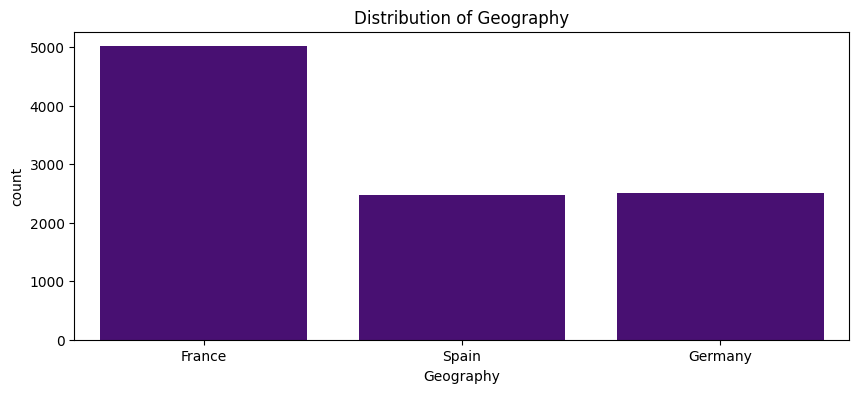

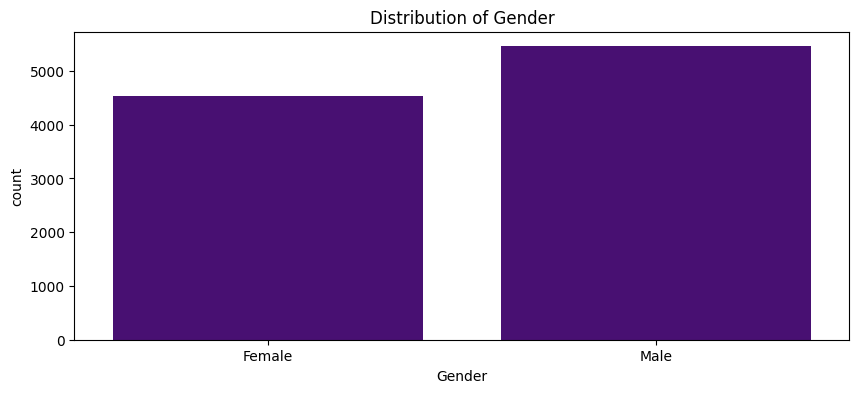

In [62]:
# Setting a hexadecimal color code for visualizations
hex_color = '#4B0082'

# List of variables to visualize
categorical_vars = ['Geography', 'Gender']

# Looping through each variable for visualization
for var in categorical_vars:
    # Creating a figure and setting its size
    plt.figure(figsize=(10, 4))

    # Creating a count plot for the current variable using seaborn
    sns.countplot(x=var, data=churn, color=hex_color)

    # Adding a title to the plot indicating the distribution of the current variable
    plt.title(f'Distribution of {var}')

    # Displaying the plot
    plt.show()


The distribution of geography shows France with the highest count, followed by nearly equal but lower counts for Spain and Germany.

The distribution of gender shows a slightly higher count for males compared to females.

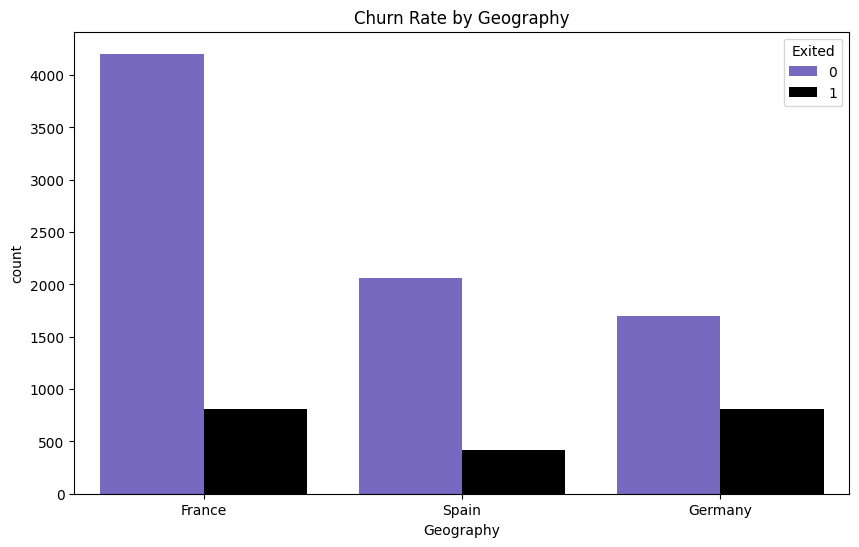

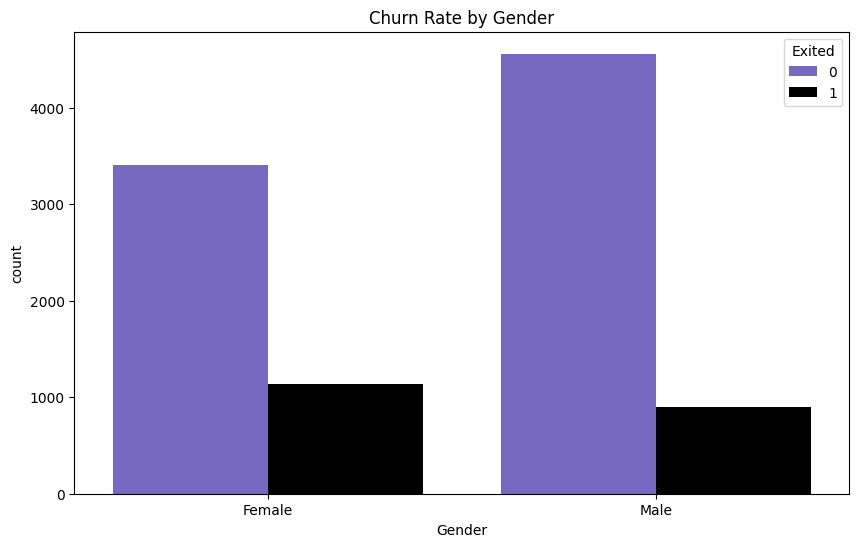

In [58]:
# Setting a hexadecimal color code for visualizations
hex_color = '#6D5ACF'

# Visualizing the relationship between Geography and Churn
plt.figure(figsize=(10, 6))
sns.countplot(x='Geography', hue='Exited', data=churn, palette=[hex_color, 'black'])
plt.title('Churn Rate by Geography')
plt.show()

# Visualizing the relationship between Gender and Churn
plt.figure(figsize=(10, 6))
sns.countplot(x='Gender', hue='Exited', data=churn, palette=[hex_color, 'black'])
plt.title('Churn Rate by Gender')
plt.show()


The churn rate by geography bar chart shows that France has the highest number of retained and exited counts, followed by Spain and Germany, with exited counts being the smallest portion in each country.

The churn rate by gender bar chart indicates that the male count of both retained and exited is slightly higher than female.

<Axes: >

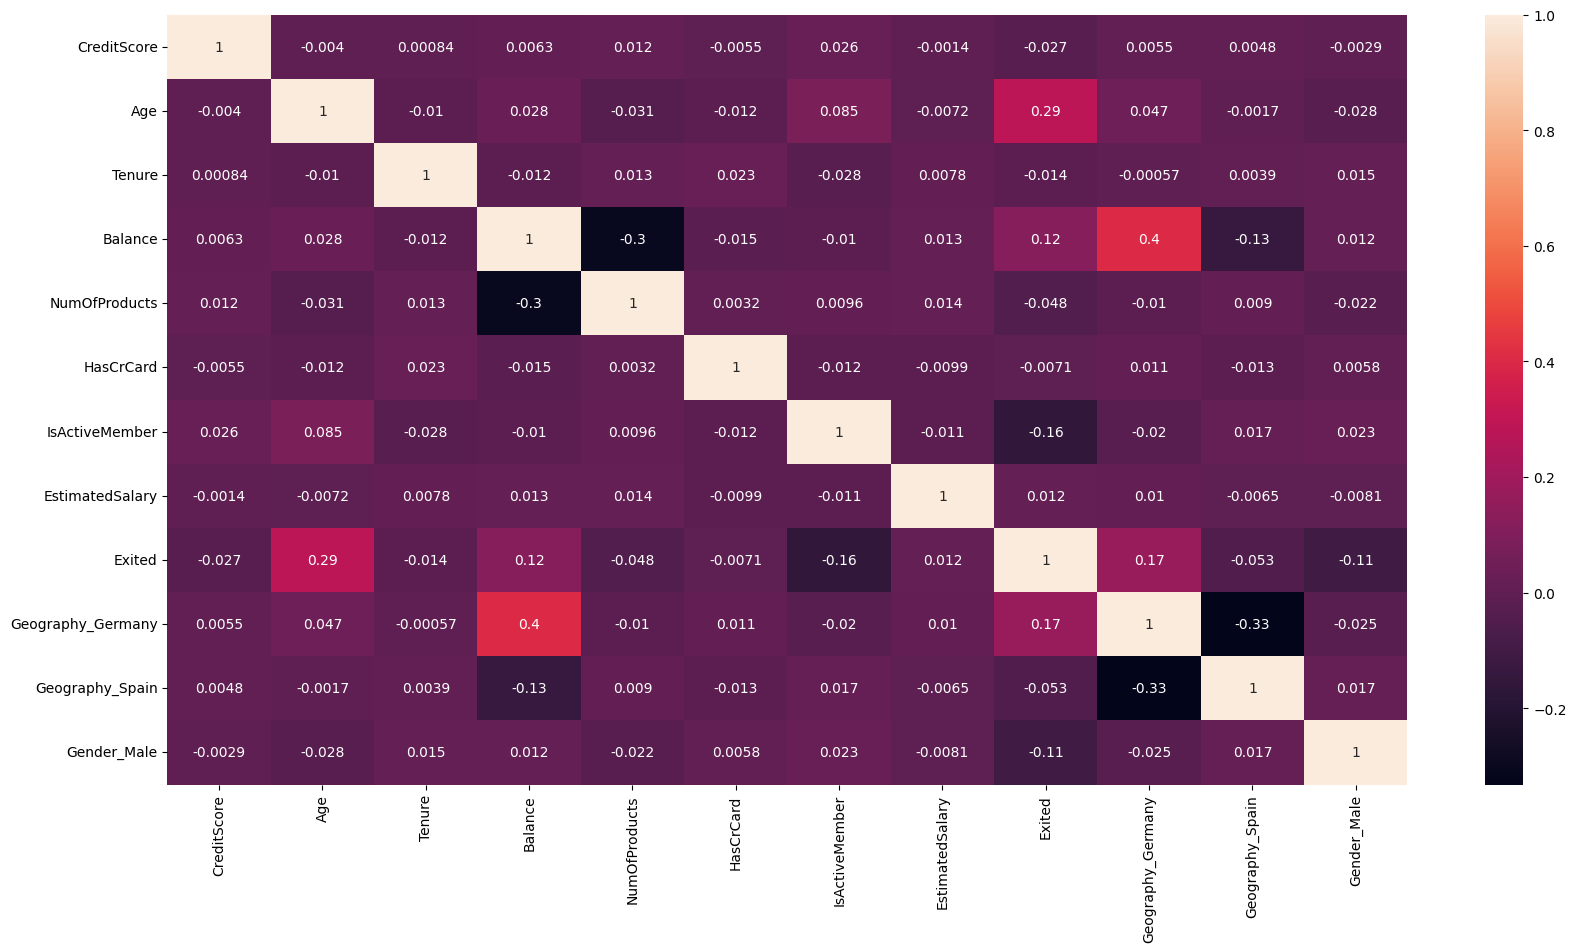

In [75]:
# Calculating the correlation matrix for the churn dataframe
corr = churn_df.corr()

# Creating a heatmap to visualize the correlation matrix
plt.figure(figsize=(20, 10))
sns.heatmap(corr, annot=True)


This heatmap represents a correlation matrix, with the strongest positive correlation shown between 'Geography' and 'Exited(Churn Rate)', indicating that customers in Germany are more likely to churn compared to other variables in the dataset.
Also there is postive correlation between between age and churn rate.

**Model Building**

In [20]:
## Defining X and y
X = churn_df.drop(columns = 'Exited')
Y = churn_df['Exited']

In [78]:
X.columns

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Geography_Germany',
       'Geography_Spain', 'Gender_Male'],
      dtype='object')

In [23]:
# Splitting the dataset into test and train
X_train,X_test,Y_train,Y_test = train_test_split(X,Y, test_size = 0.20, random_state = 21)

In [65]:
#Feature scaling using Standard Scaler
sc =StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

**Model 1 - Logistic Regression**

In [82]:
# Creating a logistic regression model
lr = LogisticRegression()

# Fitting the model to the training data
lr.fit(X_train, Y_train)


LogisticRegression()

In [83]:
# Predicting using the model
y_pred = lr.predict(X_test)

In [68]:
# Printing the classification repoty
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.95      0.89      1600
           1       0.52      0.21      0.30       400

    accuracy                           0.80      2000
   macro avg       0.67      0.58      0.59      2000
weighted avg       0.77      0.80      0.77      2000



The model achieves good precision for non-churn, but low recall and F1-score for churn, indicating we can opt for other ML models.

In [69]:
# Calculating evaluation metrics for the logistic regression model
acc = accuracy_score(Y_test, y_pred)
prec = precision_score(Y_test, y_pred)
rec = recall_score(Y_test, y_pred)
f1 = f1_score(Y_test, y_pred)

# Creating a dataframe to store the results
results = pd.DataFrame([['Logistic Regression', acc, prec, rec, f1]],
                       columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])


In [70]:
results

,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression,0.8035,0.521739,0.21,0.299465


The logistic regression model achieves an overall accuracy of 80.35% with higher precision for non-churn cases but lower recall and F1 score for churn cases, suggesting potential challenges in accurately identifying churn instances.

In [71]:
# Generating the confusion matrix for the logistic regression model
cm = confusion_matrix(y_pred, Y_test)

# Printing the confusion matrix
print(cm)


[[1523  316]
 [  77   84]]


The confusion matrix indicates that the logistic regression model correctly predicted 84 instances of churn (true positives) but had a high number of false negatives, suggesting potential limitations in accurately identifying churn cases.

**GridSearchCV**

In [72]:
# Creating a logistic regression model with specified hyperparameters and random state
lr = LogisticRegression(random_state=21)

# Defining the parameter grid for hyperparameter tuning
param_grid = {
    'max_iter': [100, 200, 300, 400, 500],
    'penalty': ['l1', 'l2'],
    'C': [0.0001, 0.001, 0.01, 0.1, 1, 10],
    'solver': ['lbfgs', 'liblinear']
}

# Creating a grid search object for logistic regression
lr_clf = GridSearchCV(estimator=lr,
                      param_grid=param_grid,
                      cv=5,
                      verbose=False,
                      n_jobs=-1)

# Fitting the grid search to the training data to find the best hyperparameters
best_lr_clf = lr_clf.fit(X_train, Y_train)

# Printing the best hyperparameters found by grid search
print('Best parameters:', best_lr_clf.best_params_)

# Making predictions using the best logistic regression model
y_pred = best_lr_clf.predict(X_test)

# Printing the classification report for the model evaluation
print(classification_report(Y_test, y_pred))

Best parameters: {'C': 0.1, 'max_iter': 100, 'penalty': 'l1', 'solver': 'liblinear'}
              precision    recall  f1-score   support

           0       0.83      0.95      0.89      1600
           1       0.52      0.20      0.29       400

    accuracy                           0.80      2000
   macro avg       0.67      0.58      0.59      2000
weighted avg       0.77      0.80      0.77      2000



/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
150 fits failed out of a total of 600.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
150 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 54, in _check_solver
    raise ValueError(
ValueError: So

The logistic regression model, optimized with hyperparameters {'C': 0.1, 'max_iter': 100, 'penalty': 'l1', 'solver': 'liblinear'}, achieves good precision for non-churn cases but struggles with recall and F1 score for identifying churn instances, suggesting potential challenges in accurately predicting churn.

In [39]:
confusion_matrix(Y_test, y_pred)

array([[1525,   75],
       [ 318,   82]])

**Model 2 - SVM**

In [40]:
# Creating a Support Vector Classifier (SVC) with a random state set to 21
svc = SVC(random_state=21)

# Fitting the SVC model to the training data
svc.fit(X_train, Y_train)

# Making predictions on the test data using the trained SVC model
y_pred = svc.predict(X_test)

# Printing the classification report to evaluate the model's performance
print(classification_report(Y_test, y_pred))


              precision    recall  f1-score   support

           0       0.86      0.98      0.91      1600
           1       0.80      0.36      0.50       400

    accuracy                           0.85      2000
   macro avg       0.83      0.67      0.71      2000
weighted avg       0.85      0.85      0.83      2000



The Support Vector Classifier (SVC) model achieves an overall accuracy of 85% with high precision and recall for non-churn cases (class 0) but lower recall for churn cases (class 1), indicating room for improvement in identifying churn instances.

**Model 3 - Random Forest**

In [41]:
# Creating a Random Forest Classifier with a random state set to 24
rf = RandomForestClassifier(random_state=24)

# Fitting the Random Forest Classifier to the training data
rf.fit(X_train, Y_train)

# Making predictions on the test data using the trained Random Forest Classifier
y_pred = rf.predict(X_test)

# Printing the classification report to evaluate the model's performance
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.96      0.92      1600
           1       0.74      0.45      0.56       400

    accuracy                           0.86      2000
   macro avg       0.81      0.70      0.74      2000
weighted avg       0.85      0.86      0.84      2000



The Random Forest Classifier achieves an overall accuracy of 86% with high precision and recall for non-churn cases (class 0), which is better than the previous two models. Hence we are going with Random Forest Classifier.

In [45]:
# Creating a Random Forest Classifier with a random state set to 24
rf = RandomForestClassifier(random_state=24)

# Defining the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [3, 4, 5, 6, 7],
    'max_features': ['sqrt', 'log2'],
    'bootstrap': [True, False]
}

# Creating a grid search object for Random Forest Classifier
rf_clf = GridSearchCV(estimator=rf,
                      param_grid=param_grid,
                      cv=5,
                      verbose=1,
                      n_jobs=-1)

# Fitting the grid search to the training data to find the best hyperparameters
best_rf_clf = rf_clf.fit(X_train, Y_train)

# Printing the best hyperparameters found by grid search
print('Best parameters:', best_rf_clf.best_params_)
print('Best accuracy score:', best_rf_clf.best_score_)
print('Best estimator:', best_rf_clf.best_estimator_)

# Making predictions using the best Random Forest Classifier model
y_pred = best_rf_clf.predict(X_test)

# Printing the classification report to evaluate the model's performance
print(classification_report(Y_test, y_pred))


Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best parameters: {'bootstrap': False, 'max_depth': 7, 'max_features': 'sqrt', 'n_estimators': 100}
Best accuracy score: 0.8608750000000001
Best estimator: RandomForestClassifier(bootstrap=False, max_depth=7, random_state=24)
              precision    recall  f1-score   support

           0       0.87      0.98      0.92      1600
           1       0.85      0.40      0.54       400

    accuracy                           0.87      2000
   macro avg       0.86      0.69      0.73      2000
weighted avg       0.86      0.87      0.85      2000



The tuned Random Forest Classifier, with optimal hyperparameters, achieves an improved accuracy of 87% and demonstrates enhanced precision and recall for identifying churn cases, indicating its effectiveness in predicting and addressing customer churing.

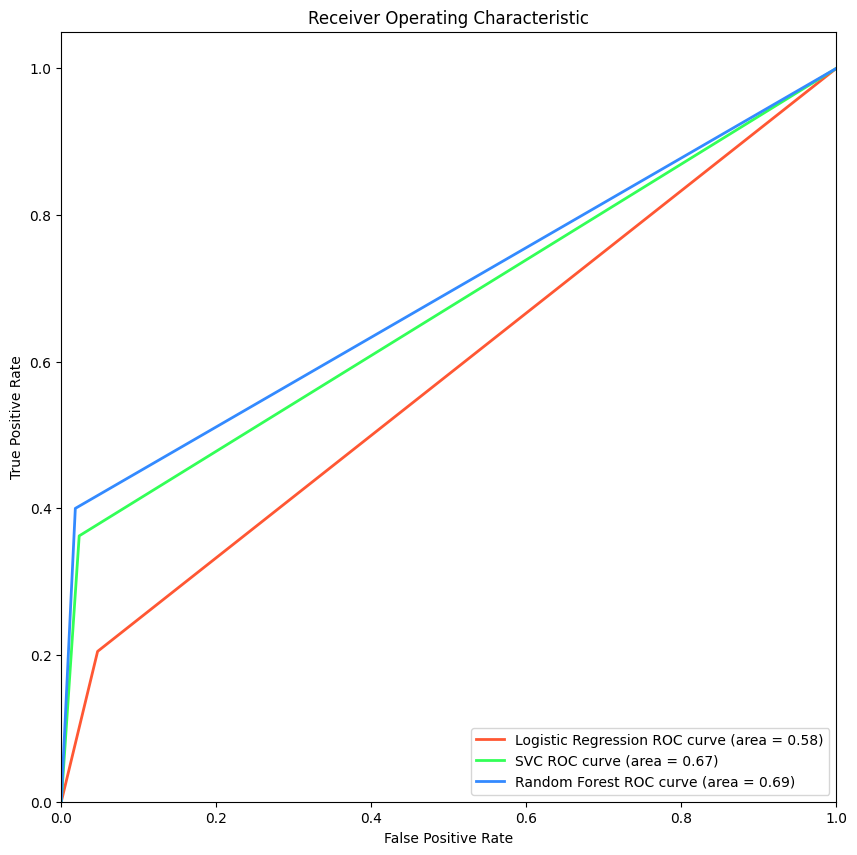

In [84]:
# Defining a new color palette for visualizations
color_palette=['#FF5733', '#33FF57', '#338AFF', '#FF33F6', '#FF5733']

# Creating a figure for ROC curve visualization
plt.figure(figsize=(10, 10))

# Calculating ROC curve and AUC for Logistic Regression
fpr1, tpr1, _ = roc_curve(Y_test, best_lr_clf.predict(X_test))
roc_auc1 = auc(fpr1, tpr1)

# Calculating ROC curve and AUC for SVC
fpr2, tpr2, _ = roc_curve(Y_test, svc.predict(X_test))
roc_auc2 = auc(fpr2, tpr2)

# Calculating ROC curve and AUC for Random Forest
fpr3, tpr3, _ = roc_curve(Y_test, best_rf_clf.predict(X_test))
roc_auc3 = auc(fpr3, tpr3)

# Plotting ROC curves for each model with the new color palette
plt.plot(fpr1, tpr1, color=color_palette[0], lw=2, label='Logistic Regression ROC curve (area = %0.2f)' % roc_auc1)
plt.plot(fpr2, tpr2, color=color_palette[1], lw=2, label='SVC ROC curve (area = %0.2f)' % roc_auc2)
plt.plot(fpr3, tpr3, color=color_palette[2], lw=2, label='Random Forest ROC curve (area = %0.2f)' % roc_auc3)

# Setting plot attributes
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


This chart is a Receiver Operating Characteristic (ROC) curve comparing the performance of three classification models, with the Random Forest model showing the highest area under the curve (AUC) at 0.69, suggesting it has the best performance of the three.

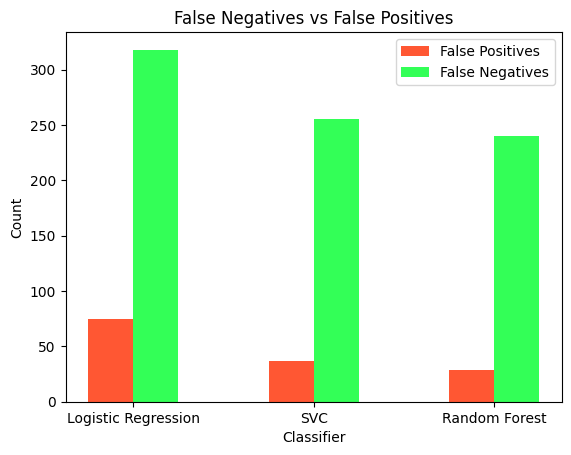

In [86]:


# Assuming best_lr_clf, svc, and best_rf_clf are already trained and Y_test, X_test are defined

# Create confusion matrices for each classifier
cm_lr = confusion_matrix(Y_test, best_lr_clf.predict(X_test))
cm_svc = confusion_matrix(Y_test, svc.predict(X_test))
cm_rf = confusion_matrix(Y_test, best_rf_clf.predict(X_test))

# Extracting false positives (FP) and false negatives (FN) from confusion matrices
fp_lr, fn_lr = cm_lr[0][1], cm_lr[1][0]
fp_svc, fn_svc = cm_svc[0][1], cm_svc[1][0]
fp_rf, fn_rf = cm_rf[0][1], cm_rf[1][0]

# Defining a new color palette
color_palette=['#FF5733', '#33FF57', '#338AFF']

# Creating a bar plot for false positives and false negatives for each classifier
bar_width = 0.25
index = np.arange(3)
fig, ax = plt.subplots()

bar1 = ax.bar(index, [fp_lr, fp_svc, fp_rf], bar_width, label='False Positives', color=color_palette[0])
bar2 = ax.bar(index + bar_width, [fn_lr, fn_svc, fn_rf], bar_width, label='False Negatives', color=color_palette[1])

# Setting plot attributes
ax.set_xlabel('Classifier')
ax.set_ylabel('Count')
ax.set_title('False Negatives vs False Positives')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(['Logistic Regression', 'SVC', 'Random Forest'])
ax.legend()

plt.show()


Logistic Regression has the lowest false negatives and false positives, SVC has the highest false negatives and moderate false positives, and Random Forest has a balance of false negatives and false positives.

If minimizing customer churn is the key business objective, then a model with the lowest false negatives would be crucial, as it would imply retaining customers who are likely to leave. In this context, Logistic Regression could be preferred if it reliably identifies customers at risk of churn. However, if the business aims to balance retention efforts with the cost of potential retention strategies (such as discounts or personalized offers), then Random Forest may be a better choice as it provides a balance, effectively identifying customers at risk of churn while also avoiding unnecessary retention efforts on those likely to stay.